In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from iminuit import Minuit

import emcee
from pprint import pprint
import time
from multiprocessing import Pool

import random

## 2002 模型检验

In [2]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_02(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_h.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [3]:
m02=Minuit(twi_minus_loglikelihood_02,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-5,5), limit_log_f_b=(-10,-2),limit_log_poisson=(0,3),
         errordef=1)
'''
多次尝试，alpha_H仍收敛到限制区间的右边界。索性放弃对alpha_H的限制。
'''

m02.migrad()

pprint(m02.fval)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


FCN = 7856.840345709504 
 TOTAL NCALL = 745 
 NCALLS = 745 
 
 
 EDM = 9.823614952407361e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.4007,0.101671,,,-5,5,No
1,log_f_b,-3.30171,0.443651,,,-10,-2,No
2,alpha_H,917.074,141550,,,,,No
3,log_poisson,1.87341,0.0164709,,,0,3,No


7856.840345709504


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


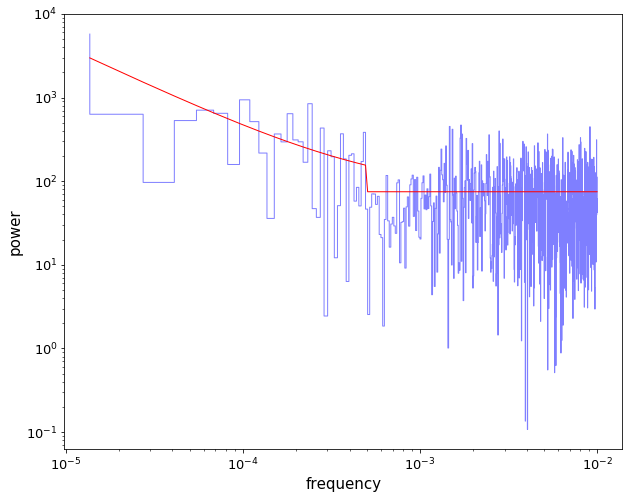

In [4]:
perdata02 = pd.read_csv("perlist02_h.csv")
f_02 = perdata02['f']
per_02 = perdata02['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m02.values[0],m02.values[1],m02.values[2],m02.values[3]

model_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_02.append(((f_02[i]**(-alpha_L))/(1+(f_02[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2002 模型比较

In [5]:
def twi_minus_loglikelihood_nobreak_02(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata02 = pd.read_csv("perlist02_h.csv")
    f = perdata02['f']
    per = perdata02['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata02)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [6]:
n02=Minuit(twi_minus_loglikelihood_nobreak_02,log_A=-9,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0),limit_log_poisson=(0,3),
         errordef=1)

n02.migrad()

print(n02.fval)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


FCN = 7864.511353246223 
 TOTAL NCALL = 428 
 NCALLS = 428 
 
 
 EDM = 1.5369944936591154e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.36911,1.4336,,,-5,0,No
1,alpha,1.22931,0.402785,,,,,No
2,log_poisson,1.84839,0.036226,,,0,3,No


7864.511353246223


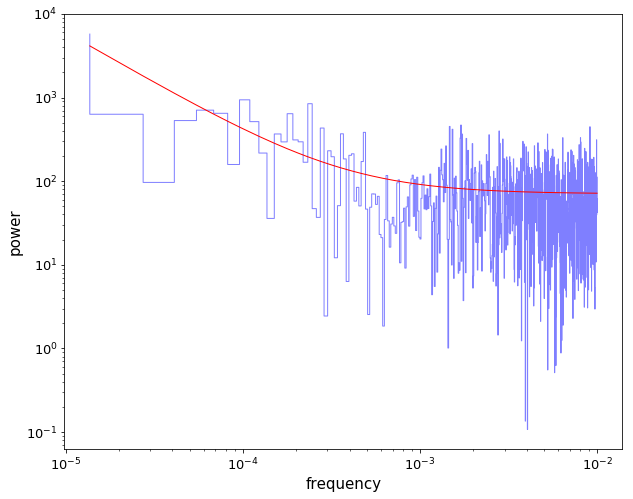

In [7]:
log_A,alpha,log_poisson = n02.values[0],n02.values[1],n02.values[2]

model_nob_02 = []
f_length_02 = len(f_02)
for i in range(f_length_02):
    model_nob_02.append((f_02[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_02, per_02, color="b", alpha=0.5, linewidth=1)
plt.plot(f_02, model_nob_02, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

7.671007536719117


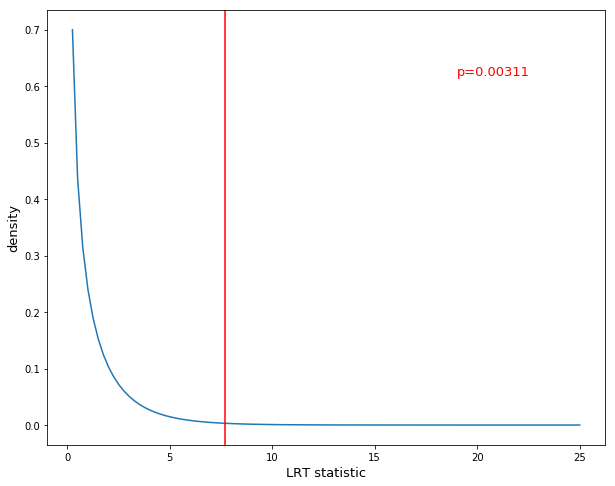

In [8]:
import scipy.stats as stats

# LRT statistic
T = n02.fval-m02.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2008(1) 模型检验

In [9]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_081(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata081 = pd.read_csv("perlist081_h.csv")
    f = perdata081['f']
    per = perdata081['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata081)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [10]:
m081=Minuit(twi_minus_loglikelihood_081,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-9,-2),limit_alpha_H=(1,5),limit_log_poisson=(0,3),
         errordef=1)
'''
参数无法正常收敛。
可能原因：对比no-break模型拟合结果，alpha_H的最佳拟合值可能小于1。
'''

m081.migrad()

pprint(m081.fval)

FCN = 7859.065187113565 
 TOTAL NCALL = 983 
 NCALLS = 983 
 
 
 EDM = 1.8113445344165944e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.03604,0.0599518,,,-3,1,No
1,log_f_b,-2.98479,6.38758,,,-9,-2,No
2,alpha_H,1,0.64521,,,1,5,No
3,log_poisson,1.51958,0.0286571,,,0,3,No


7859.065187113565


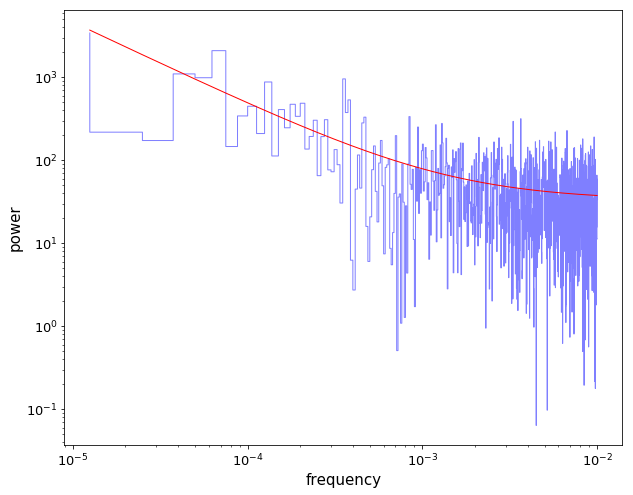

In [11]:
perdata081 = pd.read_csv("perlist081_h.csv")
f_081 = perdata081['f']
per_081 = perdata081['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m081.values[0],m081.values[1],m081.values[2],m081.values[3]

model_081 = []
f_length_081 = len(f_081)
for i in range(f_length_081):
    model_081.append(((f_081[i]**(-alpha_L))/(1+(f_081[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_081, per_081, color="b", alpha=0.5, linewidth=1)
plt.plot(f_081, model_081, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2008(1) 模型比较

In [12]:
def twi_minus_loglikelihood_nobreak_081(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata081 = pd.read_csv("perlist081_h.csv")
    f = perdata081['f']
    per = perdata081['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata081)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [13]:
n081=Minuit(twi_minus_loglikelihood_nobreak_081,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,0),limit_alpha=(0,5),limit_log_poisson=(0,3),
         errordef=1)

n081.migrad()

pprint(n081.fval)

FCN = 7859.041314869446 
 TOTAL NCALL = 177 
 NCALLS = 177 
 
 
 EDM = 8.825588916779138e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.26561,0.569189,,,-5,0,No
1,alpha,0.979432,0.163858,,,0,5,No
2,log_poisson,1.51282,0.0635758,,,0,3,No


7859.041314869446


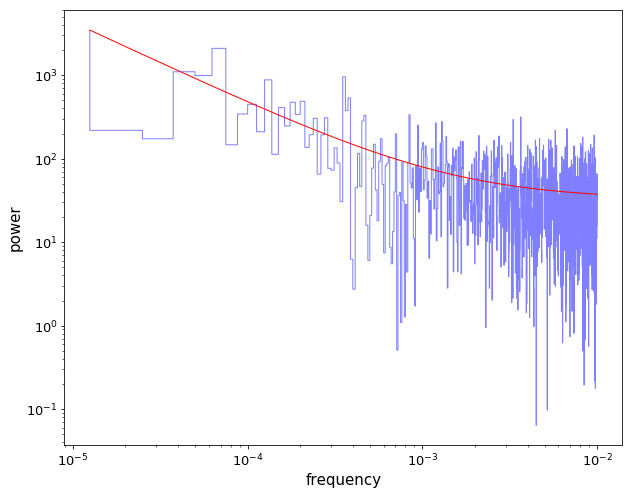

In [14]:
log_A,alpha,log_poisson = n081.values[0],n081.values[1],n081.values[2]

model_nob_081 = []
f_length_081 = len(f_081)
for i in range(f_length_081):
    model_nob_081.append((f_081[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_081, per_081, color="b", alpha=0.5, linewidth=1)
plt.plot(f_081, model_nob_081, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

-0.023872244119047537


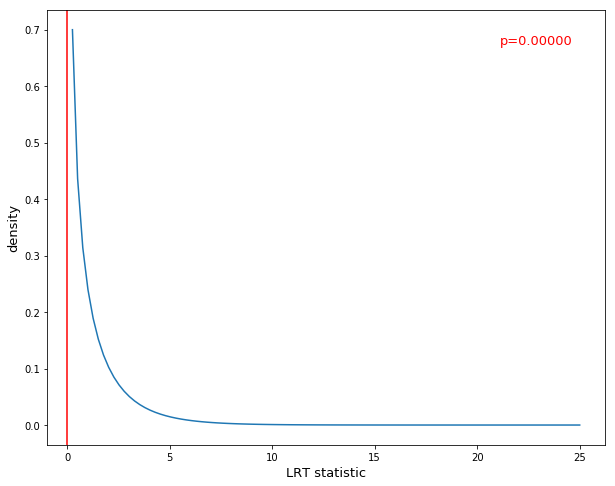

In [15]:
import scipy.stats as stats

# LRT statistic
T = n081.fval-m081.fval
print(T)
'''
负值，表示此时no-break模型更好
'''

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()



## 2010(1) 模型检验

In [16]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_101(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata101 = pd.read_csv("perlist101_h.csv")
    f = perdata101['f']
    per = perdata101['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata101)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [17]:
m101=Minuit(twi_minus_loglikelihood_101,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.0,5.0),limit_log_poisson=(0,3),
         errordef=1)

m101.migrad()

pprint(m101.fval)

FCN = 11341.666120210015 
 TOTAL NCALL = 552 
 NCALLS = 552 
 
 
 EDM = 4.800253333348699e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.931986,0.121692,,,-3,1,No
1,log_f_b,-3.45181,0.131891,,,-5,-2,No
2,alpha_H,3.78692,1.43788,,,1,5,No
3,log_poisson,1.98877,0.0151787,,,0,3,No


11341.666120210015


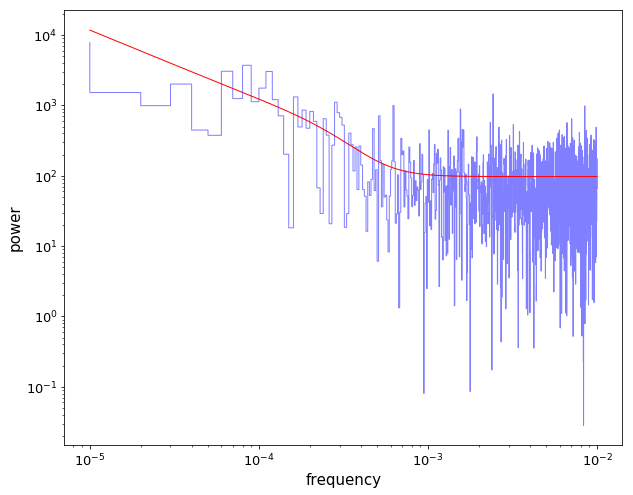

In [18]:
perdata101 = pd.read_csv("perlist101_h.csv")
f_101 = perdata101['f']
per_101 = perdata101['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m101.values[0],m101.values[1],m101.values[2],m101.values[3]

model_101 = []
f_length_101 = len(f_101)
for i in range(f_length_101):
    model_101.append(((f_101[i]**(-alpha_L))/(1+(f_101[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_101, per_101, color="b", alpha=0.5, linewidth=1)
plt.plot(f_101, model_101, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2010(1) 模型比较

In [19]:
def twi_minus_loglikelihood_nobreak_101(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata101 = pd.read_csv("perlist101_h.csv")
    f = perdata101['f']
    per = perdata101['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata101)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [20]:
n101=Minuit(twi_minus_loglikelihood_nobreak_101,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-6,1),limit_alpha=(0,5),limit_log_poisson=(0,3),
         errordef=1)

n101.migrad()

pprint(n101.fval)

FCN = 11348.594150360472 
 TOTAL NCALL = 189 
 NCALLS = 189 
 
 
 EDM = 9.256871540688629e-07 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-2.94105,0.748211,,,-6,1,No
1,alpha,1.48482,0.206517,,,0,5,No
2,log_poisson,1.96548,0.0192987,,,0,3,No


11348.594150360472


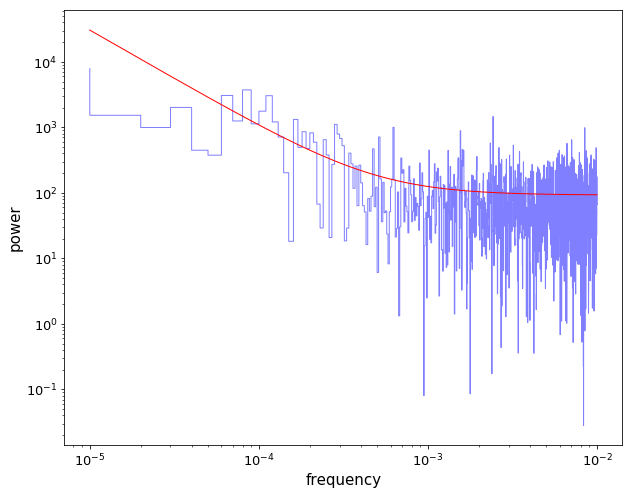

In [21]:
log_A,alpha,log_poisson = n101.values[0],n101.values[1],n101.values[2]

model_nob_101 = []
f_length_101 = len(f_101)
for i in range(f_length_101):
    model_nob_101.append((f_101[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_101, per_101, color="b", alpha=0.5, linewidth=1)
plt.plot(f_101, model_nob_101, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

6.928030150456834


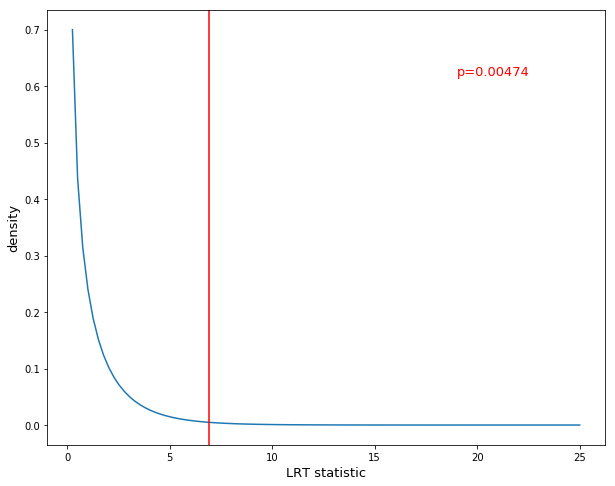

In [22]:
import scipy.stats as stats

# LRT statistic
T = n101.fval-m101.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2007(4) 模型检验

In [23]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_074(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata074 = pd.read_csv("perlist074_h.csv")
    f = perdata074['f']
    per = perdata074['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata074)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [24]:
m074=Minuit(twi_minus_loglikelihood_074,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,0), limit_log_f_b=(-5,-2),limit_log_poisson=(0,3),
         errordef=1)
'''
多次尝试，alpha_H仍收敛到限制区间的右边界。索性放弃对alpha_H的限制。
'''

m074.migrad()

pprint(m074.fval)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]


FCN = 4001.647554216671 
 TOTAL NCALL = 649 
 NCALLS = 649 
 
 
 EDM = 1.9452323856100126e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.21933,0.161921,,,-3,0,No
1,log_f_b,-3.63048,0.495295,,,-5,-2,No
2,alpha_H,295.959,6925.88,,,,,No
3,log_poisson,1.67025,0.0217529,,,0,3,No


4001.647554216671


F:\Anaconda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


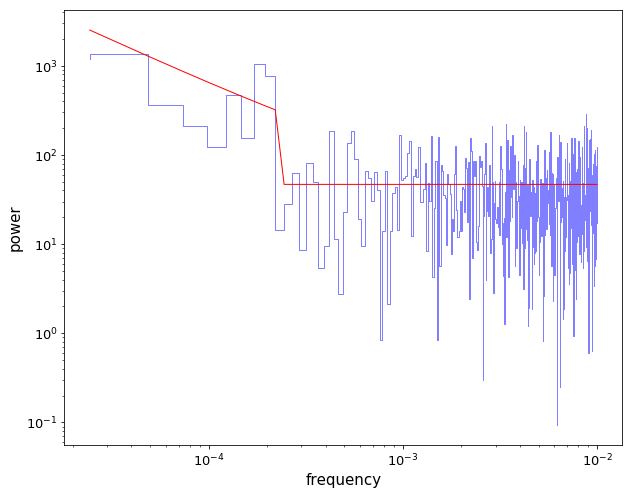

In [25]:
perdata074 = pd.read_csv("perlist074_h.csv")
f_074 = perdata074['f']
per_074 = perdata074['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m074.values[0],m074.values[1],m074.values[2],m074.values[3]

model_074 = []
f_length_074 = len(f_074)
for i in range(f_length_074):
    model_074.append(((f_074[i]**(-alpha_L))/(1+(f_074[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_074, per_074, color="b", alpha=0.5, linewidth=1)
plt.plot(f_074, model_074, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(4) 模型比较

In [26]:
def twi_minus_loglikelihood_nobreak_074(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata074 = pd.read_csv("perlist074_h.csv")
    f = perdata074['f']
    per = perdata074['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata074)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [27]:
n074=Minuit(twi_minus_loglikelihood_nobreak_074,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-5,1),limit_log_poisson=(0,3),
         errordef=1)

n074.migrad()

pprint(n074.fval)

FCN = 4012.7088463451787 
 TOTAL NCALL = 169 
 NCALLS = 169 
 
 
 EDM = 2.4215129600799523e-06 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-3.61075,1.43767,,,-5,1,No
1,alpha,1.55855,0.416226,,,,,No
2,log_poisson,1.64674,0.029197,,,0,3,No


4012.7088463451787


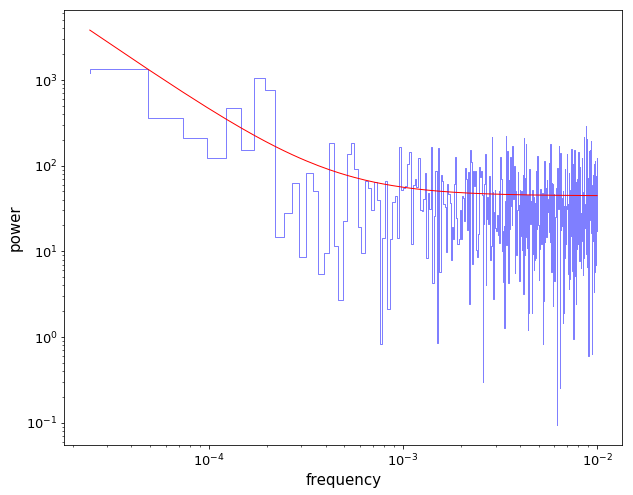

In [28]:
log_A,alpha,log_poisson = n074.values[0],n074.values[1],n074.values[2]

model_nob_074 = []
f_length_074 = len(f_074)
for i in range(f_length_074):
    model_nob_074.append((f_074[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_074, per_074, color="b", alpha=0.5, linewidth=1)
plt.plot(f_074, model_nob_074, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

11.06129212850783


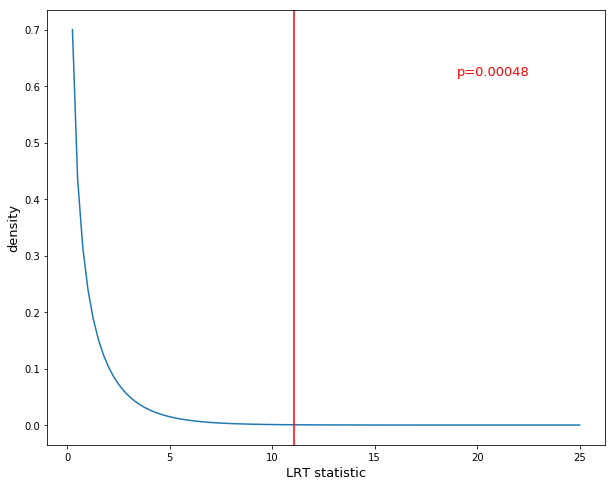

In [29]:
import scipy.stats as stats

# LRT statistic
T = n074.fval-m074.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 2007(2) 模型检验

In [30]:
# 似然函数 p; D = -2 ln p

def twi_minus_loglikelihood_072(log_A,log_f_b,alpha_H,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_h.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append(((f[i]**(-alpha_L))/(1+(f[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [31]:
m072=Minuit(twi_minus_loglikelihood_072,log_A=math.log(0.005,10),log_f_b=math.log(1.7E-4,10),alpha_H=3.8,log_poisson=0.0,
         error_log_A=0.1,error_log_f_b=0.1,error_alpha_H=0.02,error_log_poisson=0.1,
         limit_log_A=(-3,1), limit_log_f_b=(-5,-2),limit_alpha_H=(1.01,5),limit_log_poisson=(0,3),
         errordef=1)
'''
这里如果把alpha_H限制区间左边界改成1.0时输出表格会标红。
'''

m072.migrad()

pprint(m072.fval)

FCN = 4302.263167403625 
 TOTAL NCALL = 457 
 NCALLS = 457 
 
 
 EDM = 0.00014042528197346138 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-0.841834,0.646187,,,-3,1,No
1,log_f_b,-3.63747,2.14673,,,-5,-2,No
2,alpha_H,1.49344,0.683836,,,1.01,5,No
3,log_poisson,1.89802,0.046837,,,0,3,No


4302.263167403625


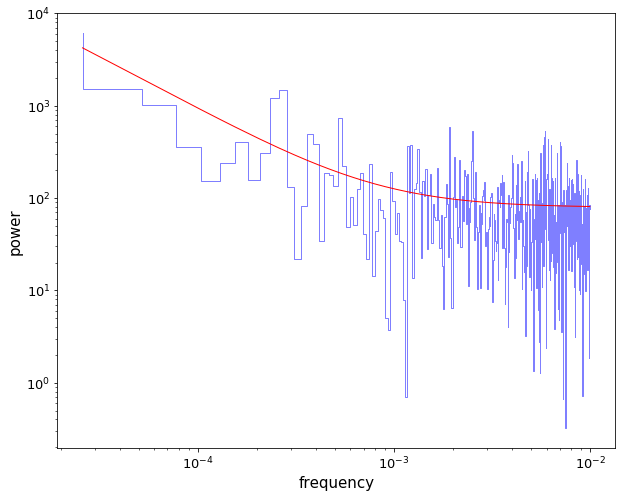

In [32]:
perdata072 = pd.read_csv("perlist072_h.csv")
f_072 = perdata072['f']
per_072 = perdata072['per']

alpha_L = 1.0
log_A,log_f_b,alpha_H,log_poisson = m072.values[0],m072.values[1],m072.values[2],m072.values[3]

model_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_072.append(((f_072[i]**(-alpha_L))/(1+(f_072[i]/(10**log_f_b))**(alpha_H-alpha_L)))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

## 2007(2) 模型比较

In [33]:
def twi_minus_loglikelihood_nobreak_072(log_A,alpha,log_poisson):
    alpha_L = 1.0
    
    perdata072 = pd.read_csv("perlist072_h.csv")
    f = perdata072['f']
    per = perdata072['per']
            
    model = []
    f_length = len(f)
    for i in range(f_length):
        model.append((f[i]**(-alpha))*(10**log_A)+(10**log_poisson))
     
    
    length = len(perdata072)
    minus_log_p = 0
    for i in range(length):
        minus_log_p += (per[i]/model[i]+math.log(model[i]))
    
    
    D = 2*minus_log_p
    # print (D)
    return D

In [34]:
n072=Minuit(twi_minus_loglikelihood_nobreak_072,log_A=-7,alpha=2.0,log_poisson=0.0,
         error_log_A=0.1,error_alpha=0.01,error_log_poisson=0.1,
         limit_log_A=(-6,1),limit_alpha=(0,5.0),limit_log_poisson=(0,3),
         errordef=1)

n072.migrad()

pprint(n072.fval)

FCN = 4302.2651397815325 
 TOTAL NCALL = 149 
 NCALLS = 149 
 
 
 EDM = 2.2214006514406833e-05 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,log_A,-1.98771,1.07212,,,-6,1,No
1,alpha,1.22869,0.302987,,,0,5,No
2,log_poisson,1.88847,0.0475461,,,0,3,No


4302.2651397815325


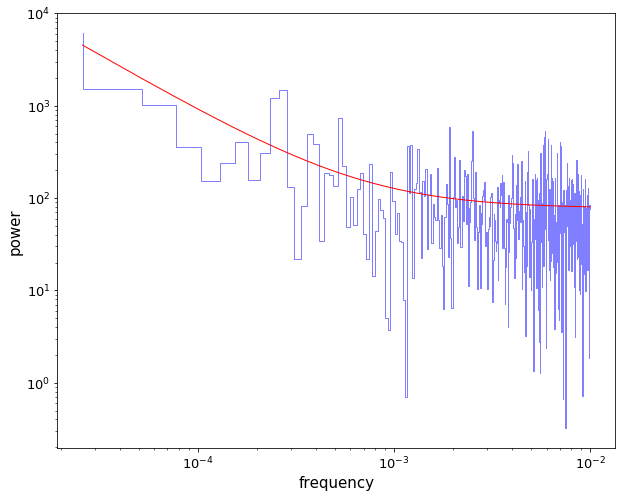

In [35]:
log_A,alpha,log_poisson = n072.values[0],n072.values[1],n072.values[2]

model_nob_072 = []
f_length_072 = len(f_072)
for i in range(f_length_072):
    model_nob_072.append((f_072[i]**(-alpha))*(10**log_A)+(10**log_poisson))

plt.figure(figsize=(10,8))
plt.loglog()
plt.step(f_072, per_072, color="b", alpha=0.5, linewidth=1)
plt.plot(f_072, model_nob_072, color="r", linewidth=1)
plt.xlabel("frequency",fontsize=15)
plt.ylabel("power",fontsize=15)
plt.tick_params(labelsize=13)
plt.show()

0.001972377907804912


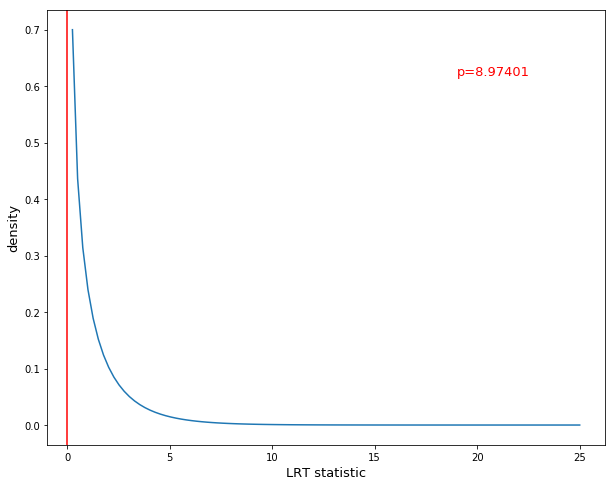

In [36]:
import scipy.stats as stats

# LRT statistic
T = n072.fval-m072.fval
print(T)

p = stats.chi2.pdf(T,1)
p1 = ("%.5f" % p)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
plt.plot(np.linspace(0,25,100),stats.chi2.pdf(np.linspace(0,25,100),df=1))
plt.axvline(T,color="r")
plt.text(0.8,0.85,'p=%s'%p1,color='red',ha='center',transform=ax.transAxes,fontsize=13)
plt.xlabel("LRT statistic",fontsize=13)
plt.ylabel("density",fontsize=13)
plt.show()

## 综合结果

In [37]:
data02 = pd.read_csv("energy_1h0707_02.csv")  
x02 = data02['x']
y02 = data02['y']
xerr02 = data02['xerr']
yerr02 = data02['yerr']

data081 = pd.read_csv("energy_1h0707_081.csv")  
x081 = data081['x']
y081 = data081['y']
xerr081 = data081['xerr']
yerr081 = data081['yerr']

data101 = pd.read_csv("energy_1h0707_101.csv")  
x101 = data101['x']
y101 = data101['y']
xerr101 = data101['xerr']
yerr101 = data101['yerr']

data074 = pd.read_csv("energy_1h0707_074.csv")  
x074 = data074['x']
y074 = data074['y']
xerr074 = data074['xerr']
yerr074 = data074['yerr']

data072 = pd.read_csv("energy_1h0707_072.csv")  
x072 = data072['x']
y072 = data072['y']
xerr072 = data072['xerr']
yerr072 = data072['yerr']

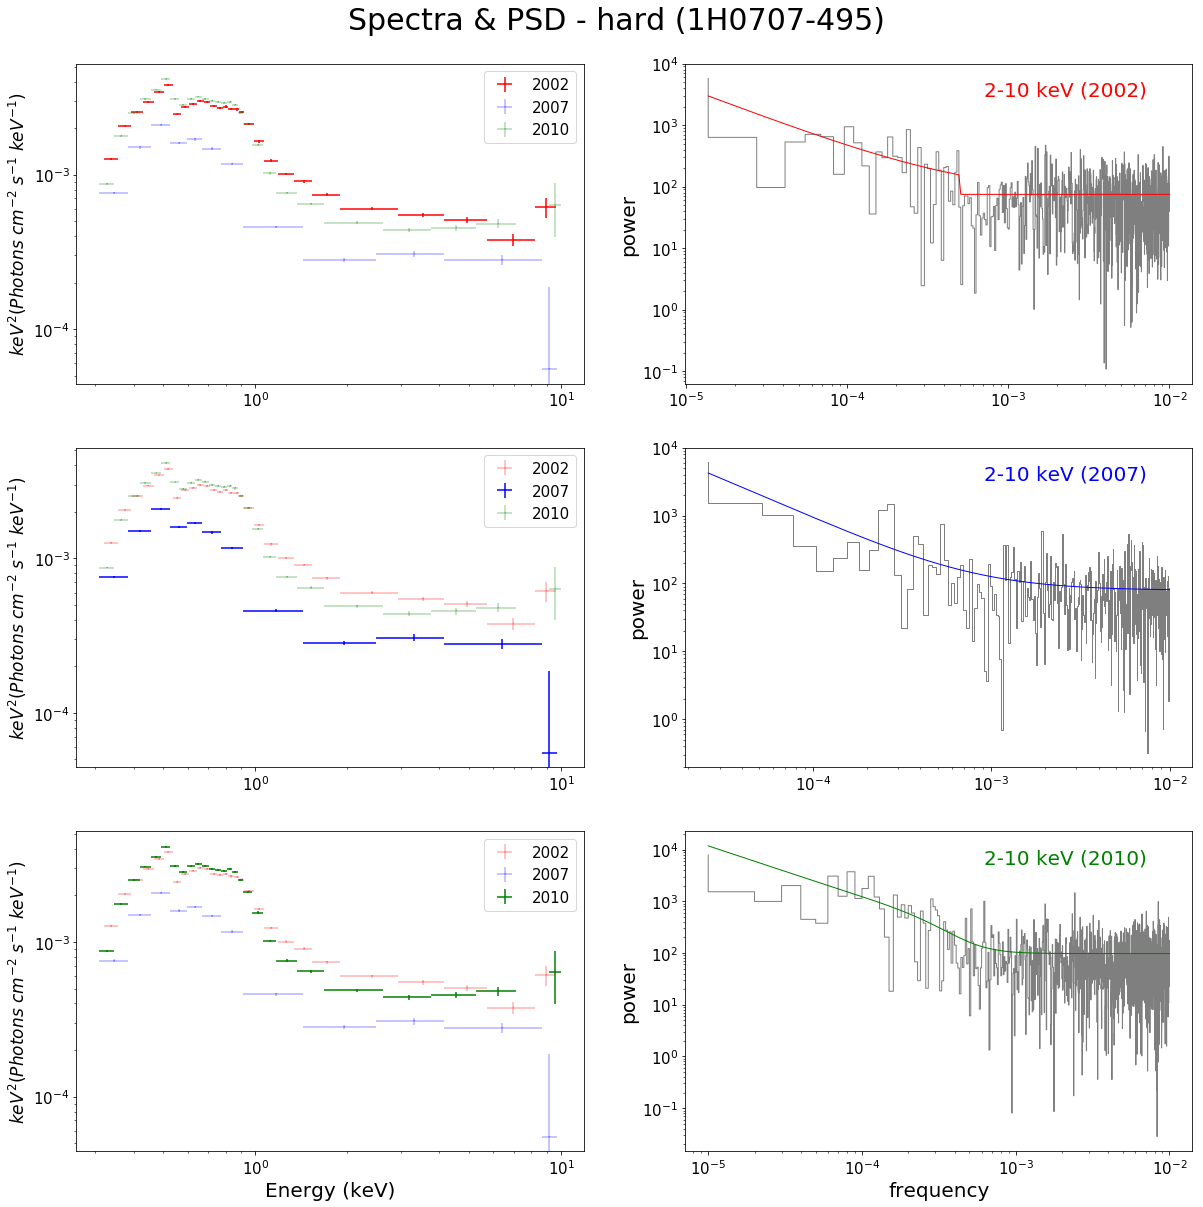

In [38]:
fig= plt.figure(figsize=(20,20))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)



ax1.loglog()
ax1.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', label='2002')
#ax1.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', alpha=0.3, label='2008')
ax1.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', alpha=0.3, label='2007')
ax1.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', alpha=0.3, label='2010')
#ax1.set_xlabel("Energy (keV)",fontsize=20)
ax1.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax1.legend(fontsize=15)
ax1.tick_params(labelsize=15)

ax3.loglog()
ax3.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
#ax3.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', label='2008')
ax3.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', label='2007')
ax3.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', alpha=0.3, label='2010')
#ax3.set_xlabel("Energy (keV)",fontsize=20)
ax3.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax3.legend(fontsize=15)
ax3.tick_params(labelsize=15)

ax5.loglog()
ax5.errorbar(x02, y02, yerr=yerr02, xerr=xerr02, fmt=',r', alpha=0.3, label='2002')
#ax5.errorbar(x081, y081, yerr=yerr081, xerr=xerr081, fmt=',b', alpha=0.3, label='2008')
ax5.errorbar(x072, y072, yerr=yerr072, xerr=xerr072, fmt=',b', alpha=0.3, label='2007')
ax5.errorbar(x101, y101, yerr=yerr101, xerr=xerr101, fmt=',g', label='2010')
ax5.set_xlabel("Energy (keV)",fontsize=20)
ax5.set_ylabel(r"$keV^2 (Photons{\ }cm^{-2}{\ } s^{-1}{\ } keV^{-1})$",fontsize=17)
ax5.legend(fontsize=15)
ax5.tick_params(labelsize=15)



ax2.loglog()
ax2.step(f_02, per_02, color="k", alpha=0.5, linewidth=1)
ax2.plot(f_02, model_02, color="r", linewidth=1)
#ax2.set_xlabel("frequency",fontsize=20)
ax2.set_ylabel("power",fontsize=20)
ax2.text(0.75,0.9,"2-10 keV (2002)",color='r',ha='center',transform=ax2.transAxes,fontsize=20)
ax2.tick_params(labelsize=15)

ax4.loglog()
ax4.step(f_072, per_072, color="k", alpha=0.5, linewidth=1)
ax4.plot(f_072, model_072, color="b", linewidth=1)
#ax4.set_xlabel("frequency",fontsize=20)
ax4.set_ylabel("power",fontsize=20)
ax4.text(0.75,-0.3,"2-10 keV (2007)",color='b',ha='center',transform=ax2.transAxes,fontsize=20)
ax4.tick_params(labelsize=15)

ax6.loglog()
ax6.step(f_101, per_101, color="k", alpha=0.5, linewidth=1)
ax6.plot(f_101, model_101, color="g", linewidth=1)
ax6.set_xlabel("frequency",fontsize=20)
ax6.set_ylabel("power",fontsize=20)
ax6.text(0.75,-1.5,"2-10 keV (2010)",color='g',ha='center',transform=ax2.transAxes,fontsize=20)
ax6.tick_params(labelsize=15)



plt.suptitle("Spectra & PSD - hard (1H0707-495)", x=0.5, y=0.92, fontsize=30)
plt.show()